# key neighbors classifier (from scruch)

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [7]:
X , y =  make_blobs(n_samples = 100  , centers = 3 , n_features = 2 , random_state = 0 ) # centers: les group

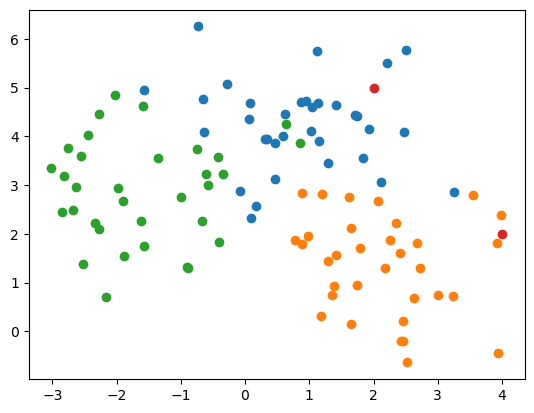

In [8]:
plt.scatter(X[y == 0][:,0] , X[y == 0][:,1],label='c1' )
plt.scatter(X[y == 1][:,0] , X[y == 1][:,1],label='c2' )
plt.scatter(X[y == 2][:,0] , X[y == 2][:,1],label='c3' )

val = [1 , 2 ]

plt.scatter( [4,2], [2,5] )

In [16]:
def kppv(X,y,x,k):
    y = y.reshape(100,1)
    d = np.sum((x-X)**2, axis=1).reshape(y.shape)
    data = np.concatenate((X,y,d) , axis = 1)
    indexs = d[:,0].argsort()[:k] # k nbr des voisein
    data = data[indexs]
    print("\n all of the neighbors :\n\n ",data)
    return data

x= np.array([3,2])
k = 4 # les neighbor
data = kppv(X,y,x,k)

labels = data[:,-2]
# THE RESULT WILL BE THE MOST OUTPUT REDENDANCE IN THIS CASE it IS 1
labels


 all of the neighbors :

  [[2.66934689 1.81987033 1.         0.14177818]
 [2.3535057  2.22404956 1.         0.46815309]
 [2.41163392 1.60423683 1.         0.50280313]
 [2.72756228 1.3051255  1.         0.55707289]]


array([1., 1., 1., 1.])

# key neighbors classifier (SKlearn)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.model_selection import train_test_split 

In [72]:
X , y =  make_blobs(n_samples = 100  , centers = 3 , n_features = 2 , random_state = 0 ) # centers: les group

In [73]:
model1 = KNeighborsClassifier()
model1.fit(X,y) # X must be  2D  and y must be  1D 
model1.score(X,y)

0.95

In [74]:
x= np.array([[3,2]])

out = model1.predict(X)
# Extract the most frequent class
most_common = pd.Series(out).mode()[0]  
print(most_common)

1


# Titanic dataset

In [130]:
from sklearn.metrics import r2_score 

In [131]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
data = df.loc[:,["PassengerId" , "Pclass" ,"Sex","Age" , "SibSp" ,"Parch" ,"Fare","Survived"]]
data.replace({"Sex":{"male":0 , "female":1}},inplace=True)
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0
887,888,1,1,19.0,0,0,30.0000,1
888,889,3,1,NaN,1,2,23.4500,0
889,890,1,0,26.0,0,0,30.0000,1


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [134]:
print(data["Age"].apply(type).value_counts())

Age
<class 'float'>    891
Name: count, dtype: int64


In [135]:
# print(data["Age"].unique())
data["Age"].fillna(data["Age"].mean() , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [136]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [137]:
data.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.543351
Age,0.033207,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,-0.057527,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,1.000000


In [138]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train,x_test ,y_train,y_test = train_test_split(x,y ,test_size=0.20 , random_state=42)
model2 = KNeighborsClassifier()
model2.fit(x_train.round(),y_train.round())
model2.score(x_train.round(),y_train.round())

0.7570224719101124

In [140]:
model2.predict(x)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,